<a href="https://colab.research.google.com/github/reinhardbuyabo/ICS4102/blob/main/Bias_vs_Variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [29]:
# IRIS FLOWER DATASET: The data set consists of 50 samples from each of 3 speci
# Load the IRIS dataset
iris = load_iris()
X, y = iris.data, iris.target # Getting the features with the target

# print(iris.data)
# print(iris.target) # [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
# print(iris.feature_names) # ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# print(iris.target_names) # ['setosa' 'versicolor' 'virginica']
print(iris.DESCR)
print(iris.filename)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [7]:
# Visualize the Dataset
import numpy as np
import matplotlib.pyplot as plt

idx = iris.target != 2 # BINARY PROBLEM
print(idx)
data = iris.data[idx].astype(np.float32)
target = iris.target[idx].astype(np.float32)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]


Text(0, 0.5, 'sepal width (cm)')

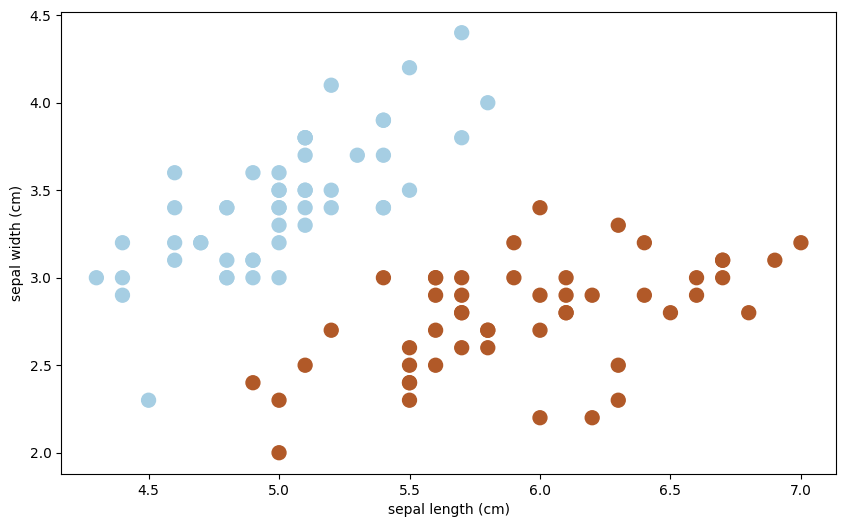

In [23]:
## Creating a scatter plot where the color of each data point corresponds to the cl ...
plt.figure(figsize=(10, 6))
plt.scatter(
    data[:, 0], # Select all rows([:]), and the 1st column(0) of the data array - for x coordinates
    data[:, 1], # Select all rows([:]), and the 2nd column(1) of the data array - for y coordinates
    c=target, # specifies the color of each point based on the target variable
    cmap=plt.cm.Paired, # map values in the target array to colors
    s=100 # Size of the points in the scatter plot
    )
plt.xlabel(iris.feature_names[0]) # Sepal Width (cm)
plt.ylabel(iris.feature_names[1]) # Sepal Length (cm)

In [21]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # random state?

In [22]:
# Train decision tree classifiers with different depths
depths = [1, 5, 10]
for depth in depths:
  tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
  tree.fit(X_train, y_train)

  # Predict and Evaluate
  y_pred_train = tree.predict(X_train)
  y_pred_test = tree.predict(X_test)
  train_acc = accuracy_score(y_train, y_pred_train)
  test_acc = accuracy_score(y_test, y_pred_test)

  print(f"Depth {depth}: Train Accuracy = {train_acc:.3f}, Test Accuracy = {test_acc:.3f}")

Depth 1: Train Accuracy = 0.648, Test Accuracy = 0.711
Depth 5: Train Accuracy = 0.990, Test Accuracy = 1.000
Depth 10: Train Accuracy = 1.000, Test Accuracy = 1.000


## 📊 Bias-Variance Analysis Summary

Given the results:

Depth 1: Train Accuracy = 0.648, Test Accuracy = 0.711
Depth 5: Train Accuracy = 0.990, Test Accuracy = 1.000
Depth 10: Train Accuracy = 1.000, Test Accuracy = 1.000


### ✅ Depth 1 — **Underfitting (High Bias)**
- **Low training and testing accuracy**
- The model is too simple to capture the underlying patterns in the data
- Exhibits **high bias**: makes strong assumptions and underfits both training and test sets

---

### ✅ Depth 5 — **Good Generalization**
- **High training accuracy** (99%) and **perfect test accuracy** (100%)
- Captures data patterns well without overfitting
- Likely represents the **best tradeoff between bias and variance**

---

### ✅ Depth 10 — **Very Low Bias, No Overfitting (Here)**
- **Perfect training and test accuracy**
- Very flexible model, capable of perfectly fitting the training data
- Despite its complexity, **does not overfit in this case** because the classes are easily separable

---

### 📌 Overall Conclusion
- The binary Iris subset is likely **linearly separable**, making it easy for even deep models to generalize well  
- **Bias is high** at lower depths  
- **Variance increases** with depth, but doesn't negatively affect generalization in this dataset  
- **Depth 5** appears to be the **optimal balance** between underfitting and overfitting


In [ ]:
# EXAMPLE 2: Ridge-Regularization IRIS
# TASK

# Perform
